In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as ss 
import matplotlib.pyplot as plt
from us_state_abbrev import abbrev_us_state as states
from matplotlib.animation import FuncAnimation as ani
import re
import copy

In [2]:
incarc_data = "incarceration_trends.csv"

In [3]:
df = pd.read_csv(incarc_data)

In [4]:
df.head()

,yfips,year,fips,state,county_name,total_pop,total_pop_15to64,female_pop_15to64,male_pop_15to64,aapi_pop_15to64,...,native_prison_pop_rate,white_prison_pop_rate,total_prison_adm_rate,female_prison_adm_rate,male_prison_adm_rate,aapi_prison_adm_rate,black_prison_adm_rate,latinx_prison_adm_rate,native_prison_adm_rate,white_prison_adm_rate
0,197001001,1970,1001,AL,Autauga County,24661,14154,7293,6861,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,197101001,1971,1001,AL,Autauga County,25503,14765,7585,7180,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,197201001,1972,1001,AL,Autauga County,27156,15939,8168,7771,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,197301001,1973,1001,AL,Autauga County,28453,16906,8651,8255,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,197401001,1974,1001,AL,Autauga County,29261,17578,8992,8586,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# state population over time
state_names = df.state.unique()
years = df.year.unique()
st_pop_time = pd.DataFrame(columns=state_names, index=years)
for state in state_names:
    sub = df[df.state==state][["total_pop", "year"]].groupby("year").sum()
    st_pop_time[state] = sub

# # plot top 10 states to confirm
# st_pop_time.sort_values(by=st_pop_time.index[-1], axis=1, ascending=False)
# st_pop_time.iloc[:, :10].plot.line()

In [8]:
# national population over time
nat_pop_time = df[["year", "state", "total_pop"]].groupby("year").sum()

In [9]:
# total incarceration and
# total incarceration adjusted for state population
tot_jail = df[["year", "state", "total_pop", "total_jail_pop"]]
tot_jail = tot_jail.groupby(["state", "year"]).sum()
tot_jail["adj_jail_pop"] = tot_jail.total_jail_pop / tot_jail.total_pop

<IPython.core.display.Javascript object>


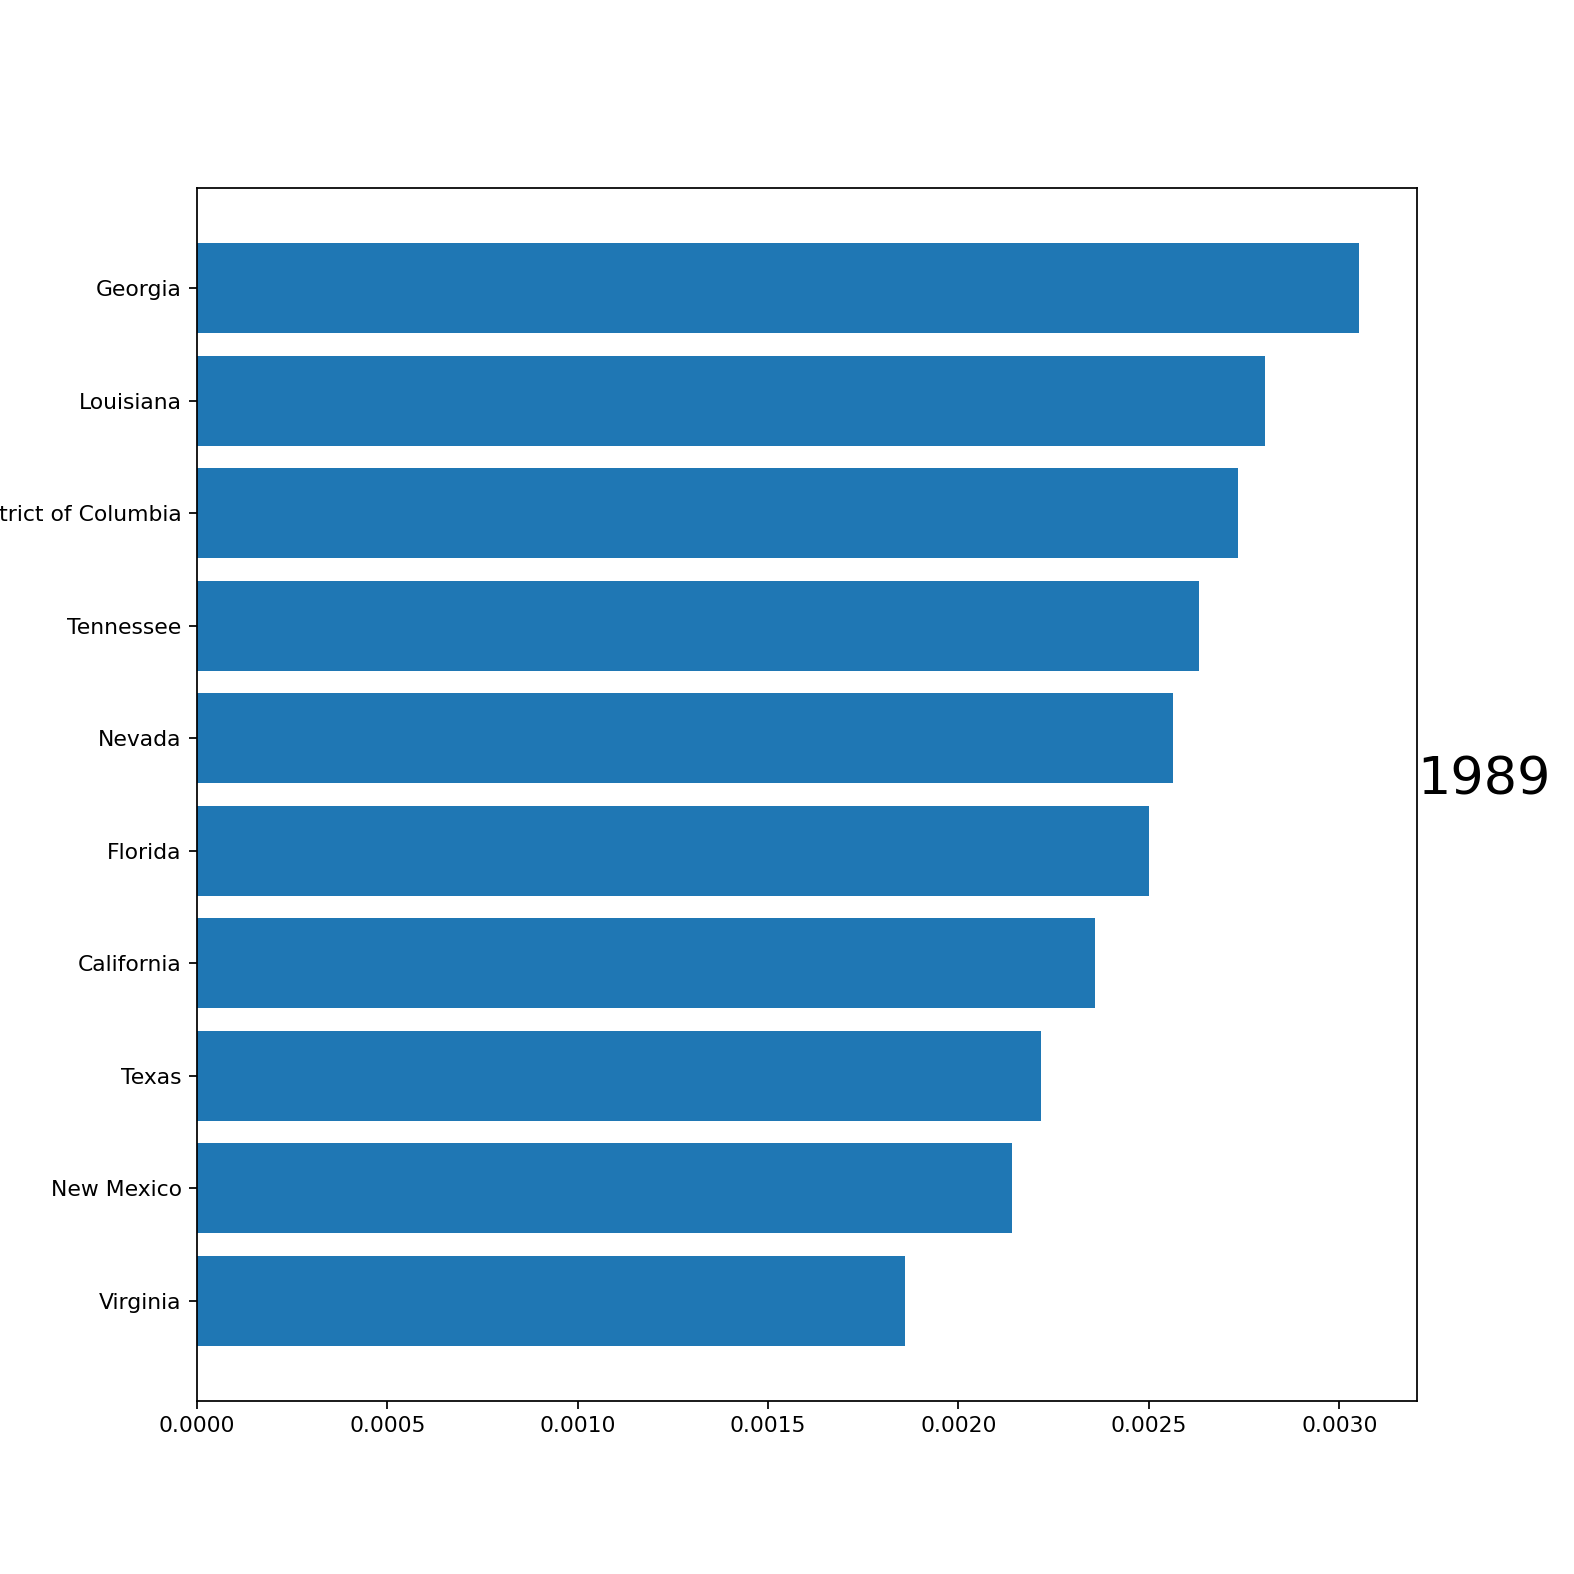

In [10]:
# animated graph of adj incarceration over time
%matplotlib notebook

data = copy.deepcopy(tot_jail)
data = tot_jail.drop(["total_pop", "total_jail_pop"], axis=1)


fig, ax = plt.subplots(figsize=(10, 10))

def barchart(year):
    ax.clear()
    top10 = data.xs(year, level="year").sort_values("adj_jail_pop", ascending=False)
    top10 = top10.iloc[:10, :]
    labels = [states[x] for x in top10.index][::-1]
    widths = top10.adj_jail_pop[::-1]
    print(year)
    ax.text(1, 0.5, str(year), transform=ax.transAxes, size=24)
    ax.barh(labels, widths)
    

years = df.year.unique()
years = list(years)
# for year in years:
#     barchart(year)
make = ani(fig, barchart, interval=500, frames=years)
# barchart(1970)

In [11]:
# extrapolate 100 points between years
tot_jail

total_pop  total_jail_pop  adj_jail_pop
state year                                         
AK    1970     255117           100.0      0.000392
      1971     265447             0.0      0.000000
      1972     275858             0.0      0.000000
      1973     282275             0.0      0.000000
      1974     291420             0.0      0.000000
...               ...             ...           ...
WY    2013     582123          1582.0      0.002718
      2014     582548          1570.0      0.002695
      2015     585668          1526.0      0.002606
      2016     584290          1534.0      0.002625
      2017     578934          1527.0      0.002638

[2448 rows x 3 columns]

In [21]:
# extrapolate n points between years
def extrap(n):
    pass

test = copy.deepcopy(tot_jail)
test = test.droplevel(level="state")
test["state"] = sorted(list(state_names) * 48)
test.drop(["total_pop", "total_jail_pop"], axis=1, inplace=True)


In [27]:
test

,adj_jail_pop,state
year,,
1970,0.000392,AK
1971,0.000000,AK
1972,0.000000,AK
1973,0.000000,AK
1974,0.000000,AK
...,...,...
2013,0.002718,WY
2014,0.002695,WY
2015,0.002606,WY
